# Statistical learning final project

---



#Heart Stroke Prediction

Strokes are the second leading cause of death globally, according to the World Health Organization (WHO). Predicting strokes is crucial for targeted interventions and preventive measures. By leveraging statistical learning techniques, we aim to identify stroke risk factors early and reduce their incidence. This project aligns with the broader goal of improving public health outcomes and enhancing quality of life.

## Dataset

* The  dataset is used to predict whether a patient is likely to get stroke based on the input variables (features).

* The dataset consists of 5110 observations, Each row (observation) provides relavant information about the patient.

* Dataset source: Kaggle


 Features:
* **id**- unique identifier
* **gender**- "Male", "Female" or "Other"
* **age**- age of the patient
* **hypertension**- 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease**- 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married**: "No" or "Yes"
* **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type**: "Rural" or "Urban"
* **avg_glucose_level**: average glucose level in blood
* **bmi**: body mass index => weight in kilograms / the square of height in meters
* **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"

Target:
* **stroke**: 1 if the patient had a stroke or 0 if not


## imports


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from time import time
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc

### Reading data

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

### Glimpse of the data

In [ ]:
data.head(10)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
data.shape

(5110, 12)

##Data Exploratoration & Visualization

### Categorial features visualization

In [ ]:
catg_features= data[['ever_married','gender','heart_disease','hypertension','Residence_type','smoking_status','work_type', 'stroke']]

In [ ]:
catg_features.columns

Index(['ever_married', 'gender', 'heart_disease', 'hypertension',
       'Residence_type', 'smoking_status', 'work_type', 'stroke'],
      dtype='object')

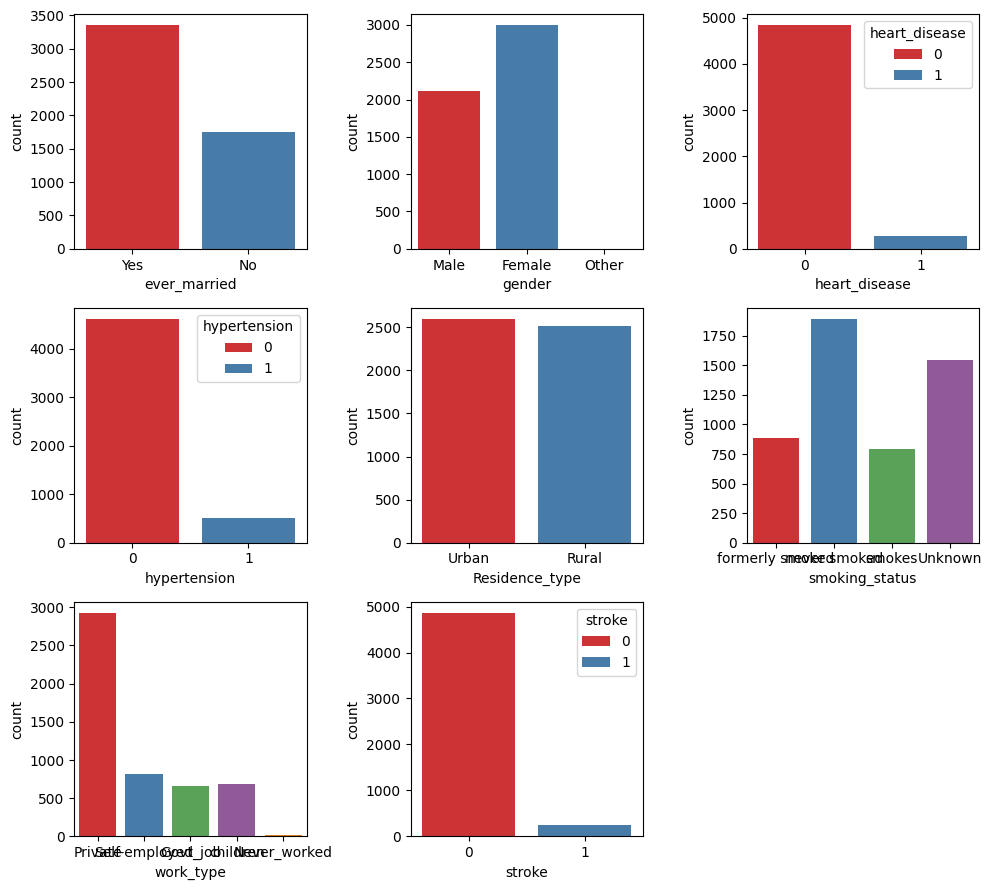

In [ ]:
plt.figure(figsize=(10,9))
for i in range(8):
  plt.subplot(3,3,i+1)
  sns.countplot(x=catg_features.columns[i], data=catg_features, hue=catg_features.columns[i], palette='Set1')
  plt.tight_layout()
plt.show()

### Numeric features visualization

<Axes: xlabel='age', ylabel='Count'>

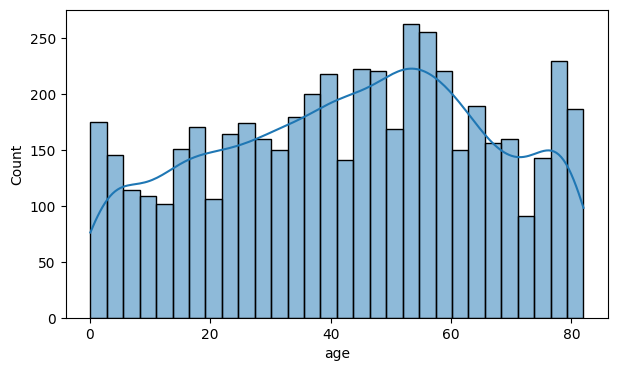

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data.age,kde=True,bins=30)

<Axes: ylabel='age'>

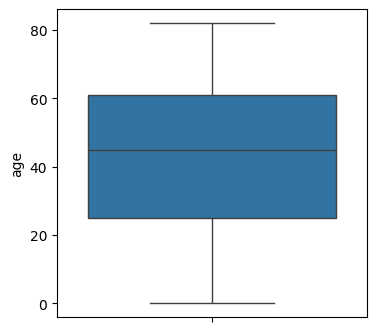

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data.age)

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

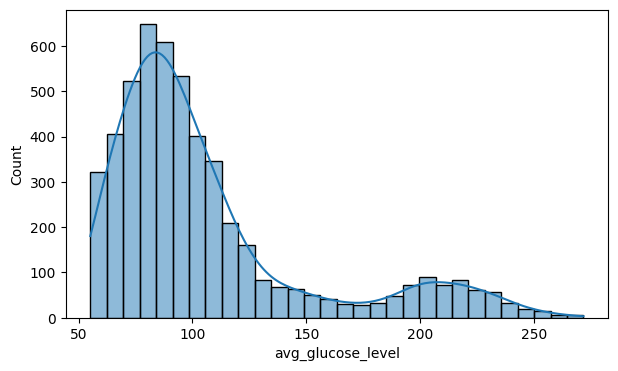

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data.avg_glucose_level,kde=True,bins=30)

<Axes: ylabel='avg_glucose_level'>

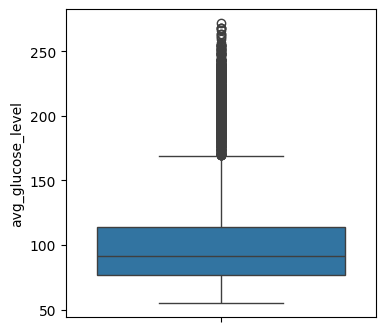

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data.avg_glucose_level)

<Axes: xlabel='bmi', ylabel='Count'>

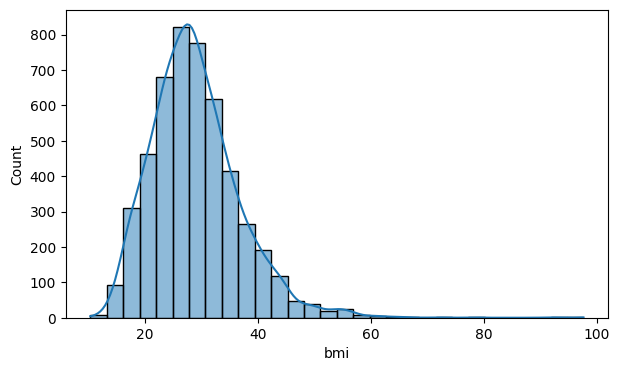

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data.bmi,kde=True,bins=30)

<Axes: ylabel='bmi'>

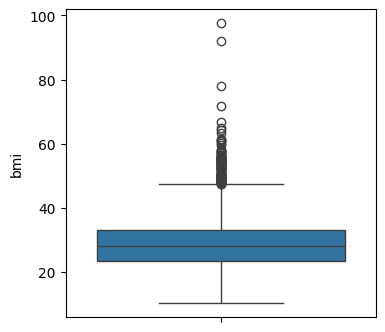

In [ ]:
plt.figure(figsize=(4,4))
sns.boxplot(data.bmi)

## Preprocessing

First we drop the id column

In [ ]:
data= data.drop(['id'],axis = 1)

In [ ]:
print('The initial Datset consists of {} features and the target variable "stroke" -> {} samples.'.format(data.shape[1]-1, data.shape[0]))

The initial Datset consists of 10 features and the target variable "stroke" -> 5110 samples.


 Checking if there are missing values (NULL)

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.isnull().sum()/data.count()*100

gender               0.00000
age                  0.00000
hypertension         0.00000
heart_disease        0.00000
ever_married         0.00000
work_type            0.00000
Residence_type       0.00000
avg_glucose_level    0.00000
bmi                  4.09452
smoking_status       0.00000
stroke               0.00000
dtype: float64

The only variable that has missing values is "bmi", and the percentage of them is low, so we kept the variable and will deal with the missing values.

In [ ]:
missing_obs= data['bmi'].isnull()

In [ ]:
data[missing_obs==True]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [ ]:
data[missing_obs==True].stroke.value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [ ]:
data[missing_obs==False].stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

We decided to fill the missing bmi values with bmi mean.
The target class is imblanaced (we will deal with this later on), so we prefer to keep the observations with the minority class ("storke" =1) to get as many observation as we can for this class, so we didn't drop them from the dataset to not lose them.


In [ ]:
data['bmi'].fillna((round(data['bmi'].mean())),inplace=True)

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,29.0,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We ensure that there is no more missing values

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Handling categorial features

We take a look at each Categorial feature and check if there are any values differ from the data description

In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

we decided to drop the single observation with different value for the gender variable- "Other".

In [ ]:
index= data[data['gender']=="Other"].index
data= data.drop(index)
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [ ]:
data.shape

(5109, 11)

In [ ]:
data['hypertension'].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

In [ ]:
data['heart_disease'].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

In [ ]:
data['ever_married'].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

In [ ]:
data['work_type'].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [ ]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

In [ ]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
data['stroke'].value_counts()

0    4860
1     249
Name: stroke, dtype: int64

We see that we have class imbalance

In [ ]:
print('After cleaning the data:\nThe Datset consists of {} features and the target variable "stroke" -> {} samples.'.format(data.shape[1]-1, data.shape[0]))

After cleaning the data:
The Datset consists of 10 features and the target variable "stroke" -> 5109 samples.


Converting categorial features to numeric

In [ ]:
# Replacing 'gender' values with 0 for Male and 1 for Female
data.loc[data['gender']=="Male", "gender"] = 0
data.loc[data['gender']=="Female", "gender"] = 1
# Replacing 'ever_married' values with 0 for No and 1 for Yes
data.loc[data['ever_married']=="No", "ever_married"] = 0
data.loc[data['ever_married']=="Yes", "ever_married"] = 1
# Replacing 'work_type' values with 0-Private, 1-Self-employed, 2-Govt_job, 3-children, 4-Never_worked
data.loc[data['work_type']=="Private", "work_type"] = 0
data.loc[data['work_type']=="Self-employed", "work_type"] = 1
data.loc[data['work_type']=="Govt_job", "work_type"] = 2
data.loc[data['work_type']=="children", "work_type"] = 3
data.loc[data['work_type']=="Never_worked", "work_type"] = 4
# Replacing 'Residence_type' values with 0 for Urban and 1 for Rural
data.loc[data['Residence_type']=="Urban", "Residence_type"] = 0
data.loc[data['Residence_type']=="Rural", "Residence_type"] = 1
# Replacing 'smoking_status' values with 0-Unknown, 1-never smoked, 2-formerly smoked, 3-smokes
data.loc[data['smoking_status']=="Unknown", "smoking_status"] = 0
data.loc[data['smoking_status']=="never smoked", "smoking_status"] = 1
data.loc[data['smoking_status']=="formerly smoked", "smoking_status"] = 2
data.loc[data['smoking_status']=="smokes", "smoking_status"] = 3

In [ ]:
#Before converting
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
data['gender']=pd.to_numeric(data['gender'])
data['ever_married']=pd.to_numeric(data['ever_married'])
data['work_type']=pd.to_numeric(data['work_type'])
data['Residence_type']=pd.to_numeric(data['Residence_type'])
data['smoking_status']=pd.to_numeric(data['smoking_status'])

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,0,228.69,36.6,2,1
1,1,61.0,0,0,1,1,1,202.21,29.0,1,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1,1
3,1,49.0,0,0,1,0,0,171.23,34.4,3,1
4,1,79.0,1,0,1,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,0,83.75,29.0,1,0
5106,1,81.0,0,0,1,1,0,125.20,40.0,1,0
5107,1,35.0,0,0,1,1,1,82.99,30.6,1,0
5108,0,51.0,0,0,1,0,1,166.29,25.6,2,0


In [ ]:
#After converting
data.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [ ]:
data.nunique().sort_values()

gender                  2
hypertension            2
heart_disease           2
ever_married            2
Residence_type          2
stroke                  2
smoking_status          4
work_type               5
age                   104
bmi                   418
avg_glucose_level    3978
dtype: int64

###Data seperation and Target handling

In [ ]:
X= data.drop(['stroke'],axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,0,228.69,36.6,2
1,1,61.0,0,0,1,1,1,202.21,29.0,1
2,0,80.0,0,1,1,0,1,105.92,32.5,1
3,1,49.0,0,0,1,0,0,171.23,34.4,3
4,1,79.0,1,0,1,1,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,0,0,83.75,29.0,1
5106,1,81.0,0,0,1,1,0,125.20,40.0,1
5107,1,35.0,0,0,1,1,1,82.99,30.6,1
5108,0,51.0,0,0,1,0,1,166.29,25.6,2


In [ ]:
y=data['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

<Axes: ylabel='stroke'>

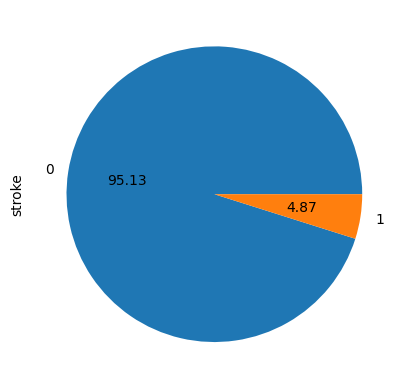

In [ ]:
y.value_counts().plot.pie(autopct="%.2f")

The data is hugely imbalanced, the majority of the observations has the value 0 for "stroke" (majority class is 0, and minority class is 1)

We will do Oversampling to get balanced dataset (to balance the target).

Boosting the number of records in the minority class

###Implementing SMOTE for Oversampling

In [ ]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [ ]:
print(X_resampled.shape, y_resampled.shape)
print("The new dataset (resampled dataset) has {} samples".format(X_resampled.shape[0]))

(9720, 10) (9720,)
The new dataset (resampled dataset) has 9720 samples


1    4860
0    4860
Name: stroke, dtype: int64


<Axes: ylabel='stroke'>

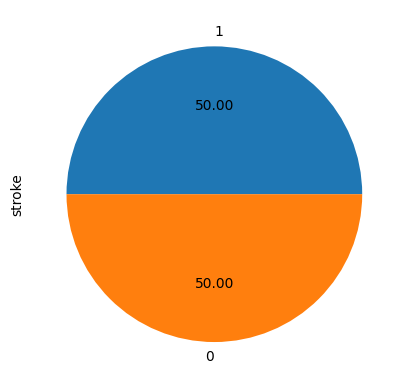

In [ ]:
print(y_resampled.value_counts())
y_resampled.value_counts().plot.pie(autopct="%.2f")

Now we have a balanced class dataset

### Correlation between the features

Correlation between features before resampling

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(X.corr().abs(), annot = True, cmap = 'Blues')
plt.show()

NameError: name 'X' is not defined

<Figure size 1300x1000 with 0 Axes>

Correlation between features after resampling

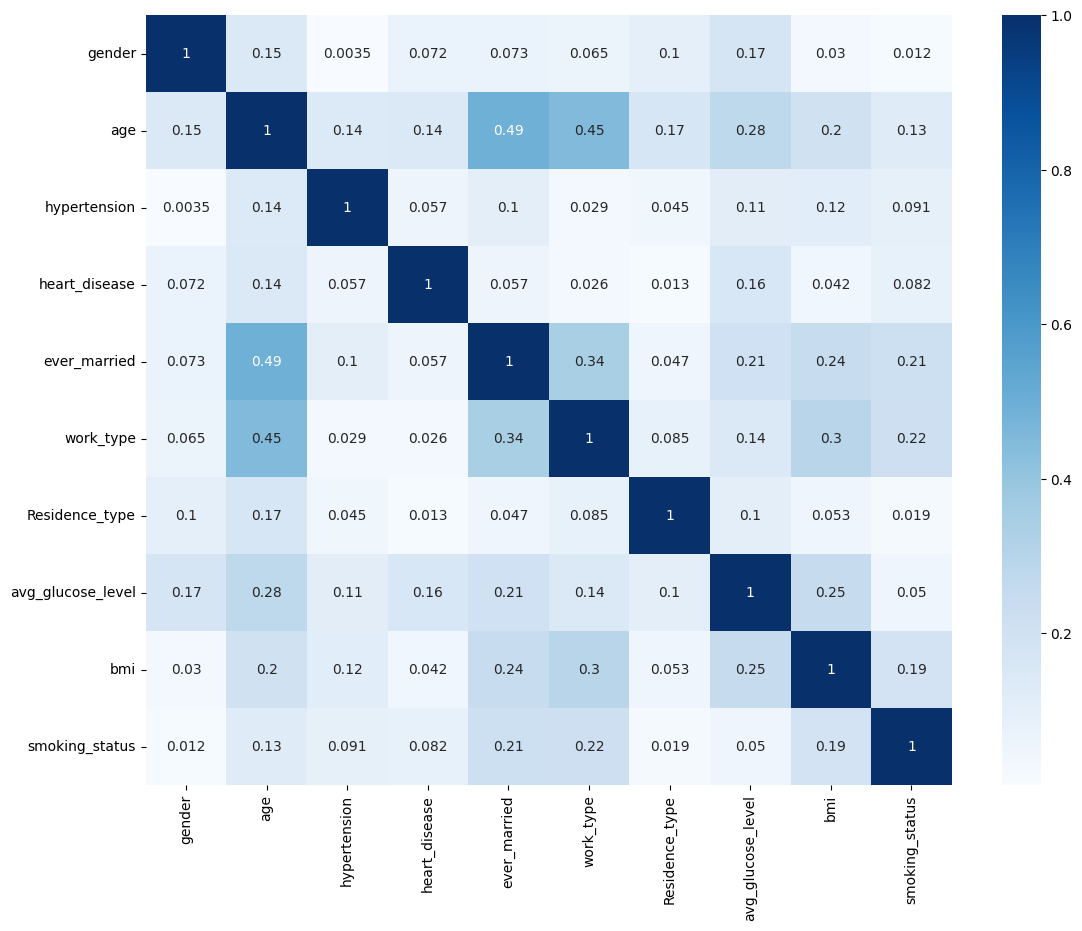

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(X_resampled.corr().abs(), annot = True, cmap = 'Blues')
plt.show()

=> Before and After resampling, there is no high correlation between any of the features, so we keep them all and don't extract any of them from the dataset or the models.

##Splitting the data into Training and Testing sets

Before resampling the data (Imbalanced dataset)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
print('Original set  --->', X.shape, y.shape)

print('Training set  --->', X_train1.shape, y_train1.shape)

print('Testing set   --->', X_test1.shape, y_test1.shape)

Original set  ---> (5109, 10) (5109,)
Training set  ---> (4087, 10) (4087,)
Testing set   ---> (1022, 10) (1022,)


After resampling the data (Balanced dataset)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=5)

In [ ]:
print('Original Resampled set  --->', X_resampled.shape,y_resampled.shape)

print('Training set  --->', X_train.shape,y_train.shape)

print('Testing set   --->', X_test.shape, y_test.shape)

Original Resampled set  ---> (9720, 10) (9720,)
Training set  ---> (7776, 10) (7776,)
Testing set   ---> (1944, 10) (1944,)


##Scaling features - Standarization

Before resampling

In [ ]:
scaler1 = StandardScaler()

In [ ]:
X_train1_scaled = scaler1.fit_transform(X_train1)
X_train1_scaled = pd.DataFrame(X_train1_scaled, columns=X.columns)
X_train1_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.827865,1.224163,-0.328006,-0.242504,0.726533,-0.745732,-0.976541,2.986923,-0.185992,-0.179643
1,-1.207926,-0.230091,-0.328006,-0.242504,-1.376400,-0.745732,1.024022,0.142065,-0.331019,-1.149523
2,-1.207926,0.827548,3.048723,-0.242504,0.726533,0.145440,1.024022,-0.232316,1.501591,1.760118
3,-1.207926,0.871617,-0.328006,-0.242504,0.726533,-0.745732,-0.976541,-0.699740,0.288640,0.790238
4,-1.207926,-1.865906,-0.328006,-0.242504,-1.376400,1.927783,1.024022,1.142927,-1.267100,-1.149523


In [ ]:
X_test1_scaled = scaler1.transform(X_test1)
X_test1_scaled = pd.DataFrame(X_test1_scaled, columns=X.columns)
X_test1_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0.827865,0.959753,-0.328006,-0.242504,0.726533,0.145440,1.024022,1.358695,-0.225545,-0.179643
1,0.827865,1.532641,-0.328006,-0.242504,-1.376400,0.145440,1.024022,-0.833542,0.341377,-1.149523
2,0.827865,0.430934,-0.328006,-0.242504,0.726533,-0.745732,1.024022,-0.488845,1.026958,-1.149523
3,0.827865,-0.362296,-0.328006,-0.242504,0.726533,-0.745732,-0.976541,-0.404443,-0.990231,-0.179643
4,-1.207926,-0.494500,-0.328006,-0.242504,-1.376400,-0.745732,1.024022,-0.993929,0.512773,-0.179643


After resampling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.077869,-1.446343,-0.297688,-0.227296,-1.619718,-0.626203,-0.750762,-1.073982,-0.612998,-0.139242
1,-0.927757,-0.091647,-0.297688,-0.227296,0.617392,-0.626203,-0.750762,-0.575633,-0.017333,-0.139242
2,1.077869,0.749151,-0.297688,-0.227296,-1.619718,0.458769,-0.750762,-0.845975,0.888110,-0.139242
3,-0.927757,0.931715,-0.297688,-0.227296,0.617392,-0.626203,-0.750762,-0.262873,-1.255367,-1.220909
4,-0.927757,0.564991,-0.297688,-0.227296,0.617392,-0.626203,-0.750762,1.987973,1.398062,-0.139242


In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.077869,0.811483,3.359220,-0.227296,0.617392,-0.626203,1.331980,1.814224,-0.063153,-0.139242
1,-0.927757,0.999362,-0.297688,-0.227296,0.617392,-0.626203,-0.750762,0.120853,0.195468,-0.139242
2,-0.927757,1.037265,-0.297688,-0.227296,0.617392,1.543741,-0.750762,0.463562,-0.276982,0.942424
3,1.077869,1.110170,-0.297688,-0.227296,0.617392,-0.626203,-0.750762,1.448399,-0.872730,-1.220909
4,1.077869,-0.091647,3.359220,-0.227296,0.617392,1.543741,-0.750762,-0.621400,0.471418,-0.139242


##Applying Supervised ML models

We will consider the following classification methods:

* Logistic Regression with L1 and L2
* KNN
* SVM with linear, polynomial and radial kernels
* Decision classification Tree
* Random Forest

Building and Evaluating the models

#(1) Logistic regression

Although logistic regression is a simpler model compared to SVMs or ensemble methods, it can still be effective for binary classification tasks like predicting stroke. Logistic regression provides interpretable coefficients that can help in understanding the influence of each feature on the likelihood of stroke.

##(1.1) Logistic Regression with `L1` penalty ("Lasso")

## Before resampling

In [ ]:
log_reg = LogisticRegression(random_state=1, solver = 'saga', max_iter = 1000)  # max_iter = 1000 - for improving convergence
                                                                                # For logistic regression with regularization one must choose 'saga' solver

parameters = {'penalty':['l1'], # L1 penalty = Lasso
              'C': np.exp(np.arange(-10,10,0.1))} # small C values means stronger regularization and the opposite

start = time()
log_reg_l1_cv1 = GridSearchCV(log_reg, parameters, cv=10, n_jobs=-1, scoring='accuracy',verbose=10).fit(X_train1_scaled, y_train1)
end = time()

print(f'Lasso running time = {round((end-start)/60,3)} minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Lasso running time = 0.739 minutes


In [ ]:
print(f'Lasso best parameters: {log_reg_l1_cv1.best_params_}')
print(f'Lasso Train Accuracy: {round(np.mean(log_reg_l1_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'Lasso Test Accuracy: {round(np.mean(log_reg_l1_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(log_reg_l1_cv1.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

Lasso best parameters: {'C': 4.5399929762484854e-05, 'penalty': 'l1'}
Lasso Train Accuracy: 0.952
Lasso Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


## After resampling

In [ ]:
log_reg = LogisticRegression(random_state=1, solver = 'saga', max_iter = 1000)  # max_iter = 1000 - for improving convergence
                                                                                # For logistic regression with regularization one must choose 'saga' solver

parameters = {'penalty':['l1'], # L1 penalty = Lasso
              'C': np.exp(np.arange(-10,10,0.1))} # small C values means stronger regularization and the opposite

start = time()
log_reg_l1_cv = GridSearchCV(log_reg, parameters, cv=10, n_jobs=-1, scoring='accuracy',verbose=10).fit(X_train_scaled, y_train)
end = time()

print(f'Lasso running time = {round((end-start)/60,3)} minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Lasso running time = 1.059 minutes


In [ ]:
print(f'Lasso best parameters: {log_reg_l1_cv.best_params_}')
print(f'Lasso Train Accuracy: {round(np.mean(log_reg_l1_cv.predict(X_train_scaled) == y_train),3)}')
print(f'Lasso Test Accuracy: {round(np.mean(log_reg_l1_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(log_reg_l1_cv.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

Lasso best parameters: {'C': 2.4596031111568544, 'penalty': 'l1'}
Lasso Train Accuracy: 0.816
Lasso Test Accuracy: 0.823


prediction,0,1,All
stroke,,,
0,780,172,952
1,173,819,992
All,953,991,1944


## (1.2)  Logistic Regression with `L2` penalty ("Ridge")

##Before resampling

In [ ]:
parameters = {'penalty':['l2'], # L2 penalty = Ridge
              'C': np.exp(np.arange(-10,10,0.1))} # small C values means stronger regularization and the opposite

start = time()
log_reg_l2_cv1 = GridSearchCV(log_reg, parameters, cv=10, n_jobs=-1, scoring='accuracy',verbose=10).fit(X_train1_scaled, y_train1)
end = time()

print(f'Ridge running time = {round((end-start)/60,3)} minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Ridge running time = 0.536 minutes


In [ ]:
print(f'Ridge best parameters: {log_reg_l2_cv1.best_params_}')
print(f'Ridge Train Accuracy: {round(np.mean(log_reg_l2_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'Ridge Test Accuracy: {round(np.mean(log_reg_l2_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(log_reg_l2_cv1.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

Ridge best parameters: {'C': 4.5399929762484854e-05, 'penalty': 'l2'}
Ridge Train Accuracy: 0.952
Ridge Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


## After resampling

In [ ]:
parameters = {'penalty':['l2'], # L2 penalty = Ridge
              'C': np.exp(np.arange(-10,10,0.1))} # small C values means stronger regularization and the opposite

start = time()
log_reg_l2_cv = GridSearchCV(log_reg, parameters, cv=10, n_jobs=-1, scoring='accuracy',verbose=10).fit(X_train_scaled, y_train)
end = time()

print(f'Ridge running time = {round((end-start)/60,3)} minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Ridge running time = 0.911 minutes


In [ ]:
print(f'Ridge best parameters: {log_reg_l2_cv.best_params_}')
print(f'Ridge Train Accuracy: {round(np.mean(log_reg_l2_cv.predict(X_train_scaled) == y_train),3)}')
print(f'Ridge Test Accuracy: {round(np.mean(log_reg_l2_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(log_reg_l2_cv.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

Ridge best parameters: {'C': 0.0030275547453757694, 'penalty': 'l2'}
Ridge Train Accuracy: 0.817
Ridge Test Accuracy: 0.819


prediction,0,1,All
stroke,,,
0,764,162,926
1,189,829,1018
All,953,991,1944


#(2) KNN

KNN could be suitable for predicting stroke risk based on the features available in the dataset. It is particularly useful when there is no clear separation between classes or when the decision boundary is non-linear. KNN can provide a straightforward approach to predicting stroke risk without assuming any specific underlying distribution of the data.

## Before resampling

In [ ]:
KNN = KNeighborsClassifier()

start = time()
knn_cv1 = GridSearchCV(KNN, param_grid={'n_neighbors': range(3, 200, 2)}, cv = 10, n_jobs=-1, verbose=10).fit(X_train1_scaled, y_train1)
stop = time()

print(f'KNN running time: {round((stop-start)/60,3)} minutes')

Fitting 10 folds for each of 99 candidates, totalling 990 fits
KNN running time: 1.008 minutes


In [ ]:
print(f'KNN best parameters: {knn_cv1.best_params_}')
print(f'KNN Train Accuracy: {round(np.mean(knn_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'KNN Test Accuracy: {round(np.mean(knn_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(knn_cv1.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

KNN best parameters: {'n_neighbors': 13}
KNN Train Accuracy: 0.952
KNN Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


## After resampling

In [ ]:
KNN = KNeighborsClassifier()

start = time()
knn_cv = GridSearchCV(KNN, param_grid={'n_neighbors': range(3, 200, 2)}, cv = 10, n_jobs=-1, verbose=10).fit(X_train_scaled, y_train)
stop = time()

print(f'KNN running time: {round((stop-start)/60,3)} minutes')

Fitting 10 folds for each of 99 candidates, totalling 990 fits
KNN running time: 2.636 minutes


In [ ]:
print(f'KNN best parameters: {knn_cv.best_params_}')
print(f'KNN Train Accuracy: {round(np.mean(knn_cv.predict(X_train_scaled) == y_train),3)}')
print(f'KNN Test Accuracy: {round(np.mean(knn_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(knn_cv.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

KNN best parameters: {'n_neighbors': 13}
KNN Train Accuracy: 0.503
KNN Test Accuracy: 0.491


prediction,0,1,All
stroke,,,
0,953,989,1942
1,0,2,2
All,953,991,1944


#(3) SVM

SVMs are powerful classifiers that work well for binary classification tasks. They aim to find the optimal hyperplane that separates the classes in the feature space, which can be effective for predicting stroke based on the individual's characteristics

##(3.1) SVM Linear kernel

##Before resampling

In [ ]:
svm = SVC(probability=True, max_iter = 500, random_state=1)
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['linear']}

start = time()
svm_l_cv1 = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train1_scaled, y_train1)
stop = time()

print(f'SVM Linear running time {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
SVM Linear running time 1.441 in minutes


In [ ]:
print(f'SVM Linear kernel best parameters: {svm_l_cv1.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Linear kernel Train Accuracy: {round(np.mean(svm_l_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'SVM Linear kernel Test Accuracy: {round(np.mean(svm_l_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(svm_l_cv1.best_estimator_.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Linear kernel best parameters: {'C': 1.0, 'kernel': 'linear'}
SVM Linear kernel Train Accuracy: 0.952
SVM Linear kernel Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


##After resampling

In [ ]:
svm = SVC(probability=True, max_iter = 500, random_state=1)
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['linear']}

start = time()
svm_l_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time()

print(f'SVM Linear running time {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
SVM Linear running time 3.633 in minutes


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Linear kernel best parameters: {svm_l_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Linear kernel Train Accuracy: {round(np.mean(svm_l_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Linear kernel Test Accuracy: {round(np.mean(svm_l_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_l_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Linear kernel best parameters: {'C': 1.0, 'kernel': 'linear'}
SVM Linear kernel Train Accuracy: 0.726
SVM Linear kernel Test Accuracy: 0.717


prediction,0,1,All
stroke,,,
0,630,227,857
1,323,764,1087
All,953,991,1944


##(3.2) SVM Polynomial kernel

##Before resampling

In [ ]:
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['poly'], 'degree': np.arange(2,6,1)}

start = time()
svm_p_cv1 = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train1_scaled, y_train1)
stop = time()

print(f'SVM Polynomial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 80 candidates, totalling 800 fits
SVM Polynomial running time 7.104 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Polynomial kernel best parameters: {svm_p_cv1.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Polynomial kernel Train Accuracy: {round(np.mean(svm_p_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'SVM Polynomial kernel Test Accuracy: {round(np.mean(svm_p_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(svm_p_cv1.best_estimator_.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Polynomial kernel best parameters: {'C': 1.0, 'degree': 2, 'kernel': 'poly'}
SVM Polynomial kernel Train Accuracy: 0.952
SVM Polynomial kernel Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


##After resampling

In [ ]:
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['poly'], 'degree': np.arange(2,6,1)}

start = time()
svm_p_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time()

print(f'SVM Polynomial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 80 candidates, totalling 800 fits
SVM Polynomial running time 21.997 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Polynomial kernel best parameters: {svm_p_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Polynomial kernel Train Accuracy: {round(np.mean(svm_p_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Polynomial kernel Test Accuracy: {round(np.mean(svm_p_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_p_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Polynomial kernel best parameters: {'C': 4.199999999999999, 'degree': 3, 'kernel': 'poly'}
SVM Polynomial kernel Train Accuracy: 0.582
SVM Polynomial kernel Test Accuracy: 0.591


prediction,0,1,All
stroke,,,
0,209,52,261
1,744,939,1683
All,953,991,1944


##(3.3) SVM Radial kernel

##Before resampling

In [ ]:
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['rbf'], 'gamma': 10**np.arange(-5, 0, 1, dtype=float)}

start = time()
svm_r_cv1 = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train1_scaled, y_train1)
stop = time()

print(f'SVM Radial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
SVM Radial running time 8.075 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Radial kernel best parameters: {svm_r_cv1.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Radial kernel Train Accuracy: {round(np.mean(svm_r_cv1.predict(X_train1_scaled) == y_train1),3)}')
print(f'SVM Radial kernel Test Accuracy: {round(np.mean(svm_r_cv1.predict(X_test1_scaled) == y_test1),3)}')
pd.crosstab(svm_r_cv1.best_estimator_.predict(X_test1_scaled), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Radial kernel best parameters: {'C': 3.1999999999999993, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Radial kernel Train Accuracy: 0.954
SVM Radial kernel Test Accuracy: 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


##After resampling

In [ ]:
parameters = {'C': np.arange(1,5,0.2), 'kernel': ['rbf'], 'gamma': 10**np.arange(-5, 0, 1, dtype=float)}

start = time()
svm_r_cv = GridSearchCV(svm, param_grid=parameters, cv=10, n_jobs=-1, verbose=3).fit(X_train_scaled, y_train)
stop = time()

print(f'SVM Radial running time {round((stop-start)/60,3)} in minutes\n')

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
SVM Radial running time 38.7 in minutes



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
print(f'SVM Radial kernel best parameters: {svm_r_cv.best_params_}') # gamma is irelevant for poly kernel
print(f'SVM Radial kernel Train Accuracy: {round(np.mean(svm_r_cv.predict(X_train_scaled) == y_train),3)}')
print(f'SVM Radial kernel Test Accuracy: {round(np.mean(svm_r_cv.predict(X_test_scaled) == y_test),3)}')
pd.crosstab(svm_r_cv.best_estimator_.predict(X_test_scaled), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

SVM Radial kernel best parameters: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
SVM Radial kernel Train Accuracy: 0.746
SVM Radial kernel Test Accuracy: 0.762


prediction,0,1,All
stroke,,,
0,707,216,923
1,246,775,1021
All,953,991,1944


#(4) Decision Trees- Classification Tree

Decision trees are intuitive models that can capture complex relationships between features and the target variable. They can provide insights into the factors contributing to stroke risk and are relatively easy to interpret, which could be valuable for understanding the predictors of stroke in your dataset.

##Before resampling

In [ ]:
C_tree = tree.DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(2,11),
              'max_features': range(3, 13)}

start = time()
classification_tree_cv1 = RandomizedSearchCV(C_tree, parameters, cv=10, n_iter=2000, n_jobs=-1, verbose=3).fit(X_train1, y_train1) # Randomized search due to high number of combinations
stop = time()

print(f'Classification Tree running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Classification Tree running time = 4.298 in minutes


In [ ]:
print(f'Classification Tree Train Accuracy = {round(classification_tree_cv1.best_score_,3)}')
print(f'Classification Tree Test Accuracy = {round(classification_tree_cv1.score(X_test1, y_test1),3)}')
pd.crosstab(classification_tree_cv1.best_estimator_.predict(X_test1), y_test1, margins=True, rownames=['stroke'], colnames=['prediction'])

Classification Tree Train Accuracy = 0.952
Classification Tree Test Accuracy = 0.949


prediction,0,1,All
stroke,,,
0,970,52,1022
All,970,52,1022


In [ ]:
classification_tree_cv1.best_param_

##After resampling

In [ ]:
C_tree = tree.DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2,11),
              'min_samples_leaf': range(2,11),
              'max_features': range(3, 10)}

start = time()
classification_tree_cv = RandomizedSearchCV(C_tree, parameters, cv=10, n_iter=2000, n_jobs=-1, verbose=3).fit(X_train, y_train) # Randomized search due to high number of combinations
stop = time()

print(f'Classification Tree running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits
Classification Tree running time = 6.399 in minutes


In [ ]:
print(f'Classification Tree best parameters: {classification_tree_cv.best_params_}')
print(f'Classification Tree Train Accuracy = {round(classification_tree_cv.best_score_,3)}')
print(f'Classification Tree Test Accuracy = {round(classification_tree_cv.score(X_test, y_test),3)}')
pd.crosstab(classification_tree_cv.best_estimator_.predict(X_test), y_test, margins=True, rownames=['stroke'], colnames=['prediction'])

Classification Tree best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 12, 'max_depth': 15}
Classification Tree Train Accuracy = 0.897
Classification Tree Test Accuracy = 0.903


prediction,0,1,All
stroke,,,
0,843,79,922
1,110,912,1022
All,953,991,1944


#(5) Random Forest classifier

 Random Forests are robust ensemble learning methods that perform well for binary classification tasks. They can handle high-dimensional data and are less prone to overfitting compared to individual decision trees. Random Forests could provide accurate predictions of stroke risk based on the features available in the dataset.

##Before resampling

In [ ]:
RF = RandomForestClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(2, 11),
              'max_features': [3], # round(sqrt(10)) = 3
              'n_estimators': [100,300,700,1000]}

start = time()
RF_cv1 = RandomizedSearchCV(RF, parameters, cv=10, n_iter=200, # 200 and not 2000 as before
                               n_jobs=-1, verbose=3).fit(X_train1, y_train1) # Randomized search due to high number of combinations
stop = time()

print(f'Random Forest running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Random Forest running time = 58.781 in minutes


In [ ]:
def Confusion_matrix(Model, Model_name, x, y, which = 'Test'):
    pred = Model.predict(x)
    return pd.crosstab(y, pred, colnames=[Model_name+' '+which+' set'], rownames=['True values'], margins=True)

In [ ]:
print(f'Random foret best parameters: {RF_cv1.best_params_}')
print(f'Random Forest Train Accuracy = {round(RF_cv1.score(X_train1, y_train1),3)}')
print(f'Random Forest Test Accuracy = {round(RF_cv1.score(X_test1, y_test1),3)}')
display(Confusion_matrix(Model = RF_cv1, Model_name='Random Forest', which='Test', x=X_test1, y=y_test1))

Random foret best parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 3, 'max_depth': 20}
Random Forest Train Accuracy = 0.955
Random Forest Test Accuracy = 0.949


Random Forest Test set,0,All
True values,,
0,970,970
1,52,52
All,1022,1022


##After resampling

In [ ]:
RF = RandomForestClassifier(random_state=1)
parameters = {'max_depth': range(5,25),
              'min_samples_split': range(2, 11),
              'min_samples_leaf': range(2, 11),
              'max_features': [3], # round(sqrt(10)) = 3
              'n_estimators': [100,300,700,1000]}

start = time()
RF_cv = RandomizedSearchCV(RF, parameters, cv=10, n_iter=200, # 200 and not 2000 as before
                               n_jobs=-1, verbose=3).fit(X_train, y_train) # Randomized search due to high number of combinations
stop = time()

print(f'Random Forest running time = {round((stop-start)/60,3)} in minutes')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Random Forest running time = 117.889 in minutes


In [ ]:
print(f'Random Forest Train Accuracy = {round(RF_cv.score(X_train, y_train),3)}')
print(f'Random Forest Test Accuracy = {round(RF_cv.score(X_test, y_test),3)}')
display(Confusion_matrix(Model = RF_cv, Model_name='Random Forest', which='Test', x=X_test, y=y_test))

Random Forest Train Accuracy = 0.989
Random Forest Test Accuracy = 0.934


Random Forest Test set,0,1,All
True values,,,
0,879,74,953
1,54,937,991
All,933,1011,1944


## Results - Train & Test Accuracies

###Before resampling

In [ ]:
# Create an empty DataFrame with zeros
before_resampling_df = pd.DataFrame(np.zeros([8, 2]), columns=['Train Accuracy', 'Test Accuracy'],
                                                  index=['LASSO', 'RIDGE', 'KNN', 'SVM Linear',
                                                         'SVM Polynomial', 'SVM Radial','Classification Tree','Random Forest'])


In [ ]:
# Assigning values to the DataFrame
before_resampling_df.loc['LASSO', 'Train Accuracy'] = round(np.mean(log_reg_l1_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['LASSO', 'Test Accuracy'] = round(np.mean(log_reg_l1_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['RIDGE', 'Train Accuracy'] = round(np.mean(log_reg_l2_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['RIDGE', 'Test Accuracy'] = round(np.mean(log_reg_l2_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['KNN', 'Train Accuracy'] = round(np.mean(knn_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['KNN', 'Test Accuracy'] = round(np.mean(knn_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['SVM Linear', 'Train Accuracy'] = round(np.mean(svm_l_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['SVM Linear', 'Test Accuracy'] = round(np.mean(svm_l_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['SVM Polynomial', 'Train Accuracy'] = round(np.mean(svm_p_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['SVM Polynomial', 'Test Accuracy'] = round(np.mean(svm_p_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['SVM Radial', 'Train Accuracy'] = round(np.mean(svm_r_cv1.predict(X_train1_scaled) == y_train1),3)
before_resampling_df.loc['SVM Radial', 'Test Accuracy'] = round(np.mean(svm_r_cv1.predict(X_test1_scaled) == y_test1),3)

before_resampling_df.loc['Classification Tree', 'Train Accuracy'] = round(classification_tree_cv1.best_score_,3)
before_resampling_df.loc['Classification Tree', 'Test Accuracy'] = round(classification_tree_cv1.score(X_test1, y_test1),3)

before_resampling_df.loc['Random Forest', 'Train Accuracy'] = round(RF_cv1.score(X_train1, y_train1),3)
before_resampling_df.loc['Random Forest', 'Test Accuracy'] = round(RF_cv1.score(X_test1, y_test1),3)


In [ ]:
print("Evalutating models for the Imbalanced Dataset - Accuracy results:\n")
before_resampling_df

Evalutating models for the Imbalanced Dataset - Accuracy results:



,Train Accuracy,Test Accuracy
LASSO,0.952,0.949
RIDGE,0.952,0.949
KNN,0.952,0.949
SVM Linear,0.952,0.949
SVM Polynomial,0.952,0.949
SVM Radial,0.954,0.949
Classification Tree,0.952,0.949
Random Forest,0.955,0.949


* Before applying the SMOTE resampling technique, the models achieved high accuracy on both the training and testing sets.
* The models demonstrated strong predictive performance before addressing class imbalance.
* The accuracies of all models were consistent between the training and testing sets, suggesting that there was no significant overfitting.

###After resampling

In [ ]:
# Create an empty DataFrame with zeros
after_resampling_df = pd.DataFrame(np.zeros([8, 2]), columns=['Train Accuracy', 'Test Accuracy'],
                                                  index=['LASSO', 'RIDGE', 'KNN', 'SVM Linear',
                                                         'SVM Polynomial', 'SVM Radial', 'Classification Tree',
                                                         'Random Forest'])

In [ ]:
# Assigning values to the DataFrame
after_resampling_df.loc['LASSO', 'Train Accuracy'] = round(np.mean(log_reg_l1_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['LASSO', 'Test Accuracy'] = round(np.mean(log_reg_l1_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['RIDGE', 'Train Accuracy'] = round(np.mean(log_reg_l2_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['RIDGE', 'Test Accuracy'] = round(np.mean(log_reg_l2_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['KNN', 'Train Accuracy'] = round(np.mean(knn_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['KNN', 'Test Accuracy'] = round(np.mean(knn_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['SVM Linear', 'Train Accuracy'] = round(np.mean(svm_l_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['SVM Linear', 'Test Accuracy'] = round(np.mean(svm_l_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['SVM Polynomial', 'Train Accuracy'] = round(np.mean(svm_p_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['SVM Polynomial', 'Test Accuracy'] = round(np.mean(svm_p_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['SVM Radial', 'Train Accuracy'] = round(np.mean(svm_r_cv.predict(X_train_scaled) == y_train),3)
after_resampling_df.loc['SVM Radial', 'Test Accuracy'] = round(np.mean(svm_r_cv.predict(X_test_scaled) == y_test),3)

after_resampling_df.loc['Classification Tree', 'Train Accuracy'] = round(classification_tree_cv.best_score_,3)
after_resampling_df.loc['Classification Tree', 'Test Accuracy'] = round(classification_tree_cv.score(X_test, y_test),3)

after_resampling_df.loc['Random Forest', 'Train Accuracy'] = round(RF_cv.score(X_train, y_train),3)
after_resampling_df.loc['Random Forest', 'Test Accuracy'] = round(RF_cv.score(X_test, y_test),3)


In [ ]:
print("Evalutating models for the Balanced Dataset - Accuracy results:\n")
after_resampling_df

Evalutating models for the Balanced Dataset - Accuracy results:



,Train Accuracy,Test Accuracy
LASSO,0.816,0.823
RIDGE,0.817,0.819
KNN,0.503,0.491
SVM Linear,0.726,0.717
SVM Polynomial,0.582,0.591
SVM Radial,0.746,0.762
Classification Tree,0.902,0.904
Random Forest,0.989,0.934


* After resampling, the accuracies of most models varied.
* Some models achieved relatively high accuracy on both training and testing sets.
* Models like SVM with Radial kernel and Classification Tree exhibited competitive accuracies without significant overfitting.
* However, models like KNN showed lower accuracies, suggesting potential challenges in generalization.

In [ ]:
comparison_df = pd.concat([before_resampling_df, after_resampling_df], axis=1)

In [ ]:
print("Evalutating models for the Imbalanced and Balanced Datasets - Accuracy results:\n")
print("The first two columns - before balancing the data\n ")
comparison_df

Evalutating models for the Imbalanced and Balanced Datasets - Accuracy results:

The first two columns - before balancing the data
 


,Train Accuracy,Test Accuracy,Train Accuracy,Test Accuracy
LASSO,0.952,0.949,0.816,0.823
RIDGE,0.952,0.949,0.817,0.819
KNN,0.952,0.949,0.503,0.491
SVM Linear,0.952,0.949,0.726,0.717
SVM Polynomial,0.952,0.949,0.582,0.591
SVM Radial,0.954,0.949,0.746,0.762
Classification Tree,0.952,0.949,0.902,0.904
Random Forest,0.955,0.949,0.989,0.934


* After applying SMOTE for oversampling, the accuracy of all models decreased on both the training and testing sets.
* This decrease in accuracy can be attributed to the introduction of synthetic samples during oversampling, which may have introduced noise or made the classification task more challenging.
* => The decrease in accuracy suggests that the models may have been overfitting to the original imbalanced dataset, and SMOTE helped improve generalization performance.
* SVM with Radial kernel and Classification Tree achieved relatively high accuracy on both the training and testing sets after resampling, indicating robust performance.
* Random Forest achieved the highest accuracy on both training and testing sets after resampling, indicating robust performance.

## Conclusion (1)

* According to the accuracy results, among tree based methods (Classification tree and Random forest): we would choose **Random forest**

* Among LASSO, RIDGE, KNN and SVM models: we would choose **Logistic Regression with L1 (LASSO)**

*  **Random forest** got the highest score in the test accuracy among all models (0.934).

## Results-  ROC Comparison

In [ ]:
def ROC_comparison(Models, Models_names, x_test, y_test, subtitle = 'Train set'):
    def plot_roc(Model, x_test, y_test):
        fpr, tpr, thresholds  = roc_curve(y_test, Model.predict_proba(x_test)[:,1])
        AUC = round(auc(fpr, tpr),5)
        plt.plot(fpr, tpr)
        return round(AUC,3)

    AUC = []
    plt.figure(figsize=(10, 10))
    for i,Model in enumerate(Models):
            AUC.append(plot_roc(Model, x_test, y_test))
            Models_names[i] = Models_names[i]+" = "+(str(AUC[i]))
    plt.plot([0,1],[0,1], '--', color='black')
    plt.legend(labels = Models_names, title = 'AUC')
    plt.grid()
    plt.title('ROC curve \n'+subtitle)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.show()

### Before resampling

###Train

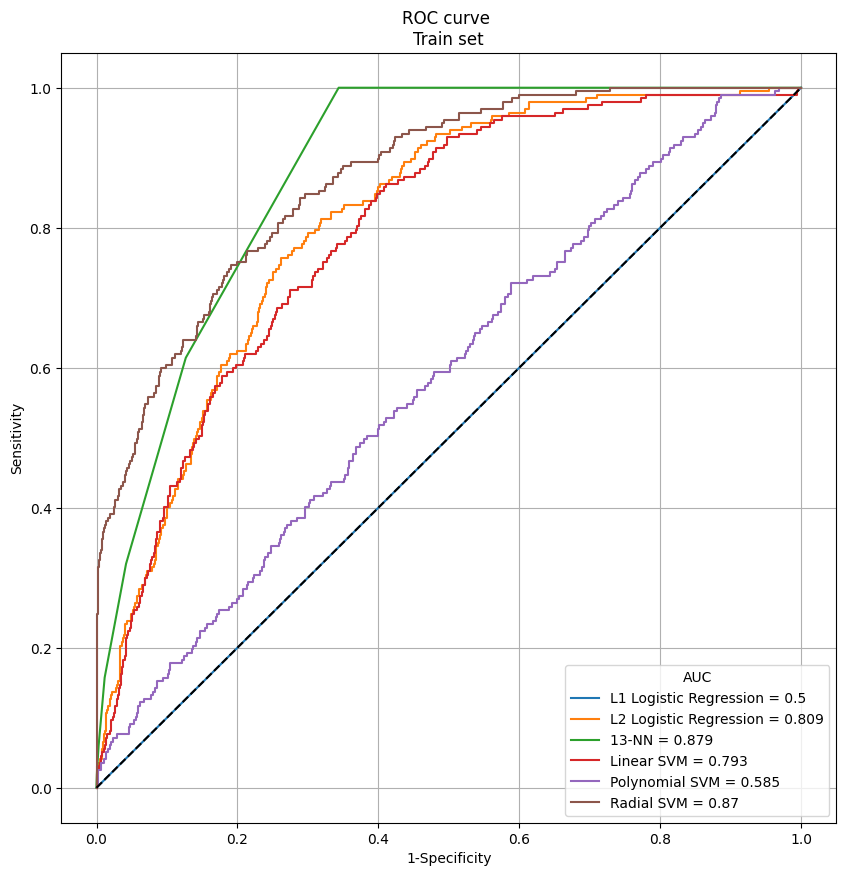

In [ ]:
Models = [log_reg_l1_cv1, log_reg_l2_cv1, knn_cv1 ,svm_l_cv1 ,svm_p_cv1 ,svm_r_cv1]
Labels = ['L1 Logistic Regression', 'L2 Logistic Regression', str(knn_cv1.best_params_['n_neighbors'])+'-NN','Linear SVM','Polynomial SVM','Radial SVM']
ROC_comparison(Models, Labels, X_train1_scaled, y_train1, 'Train set')


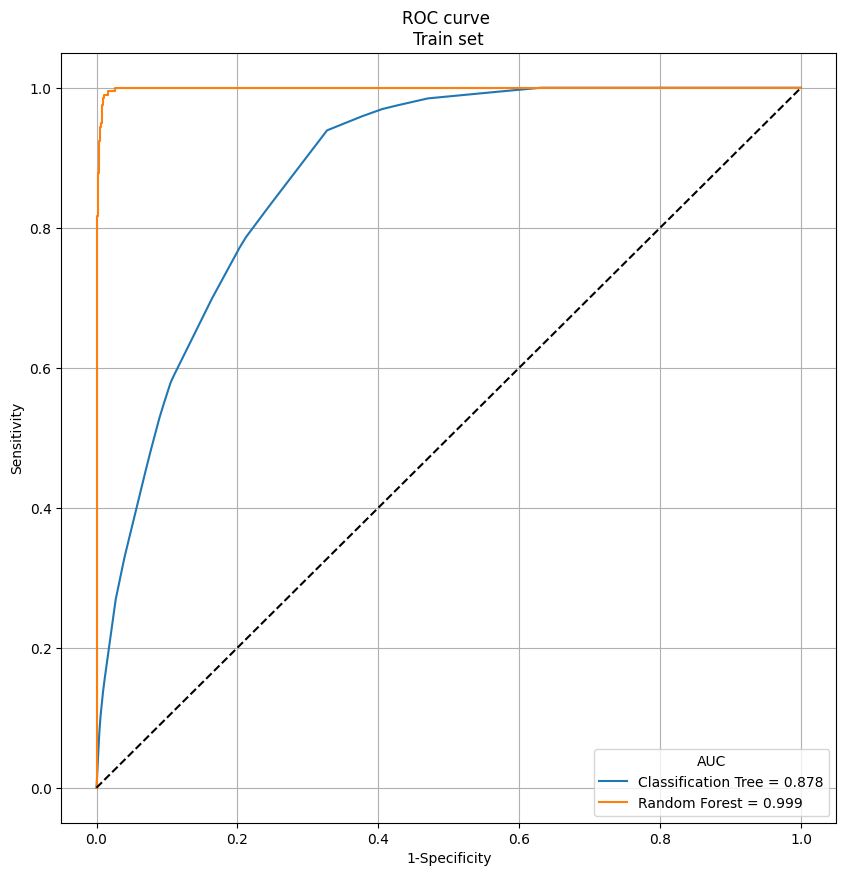

In [ ]:
Models = [classification_tree_cv1,RF_cv1]
Labels = ['Classification Tree','Random Forest']
ROC_comparison(Models, Labels, X_train1, y_train1, 'Train set')


###Test

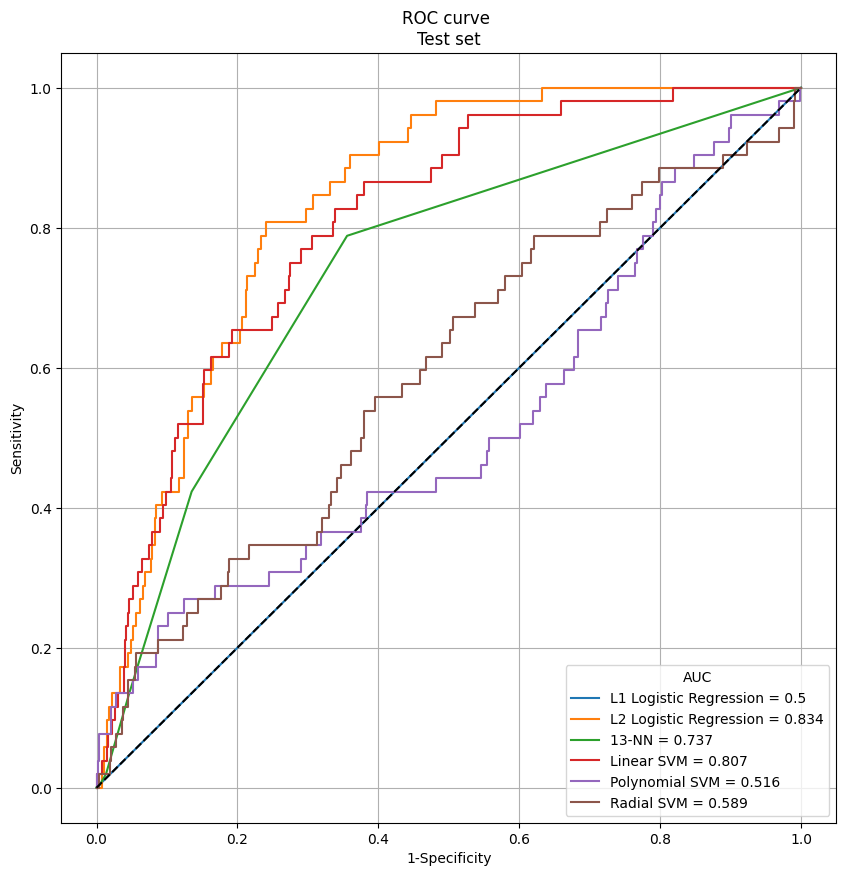

In [ ]:
Models = [log_reg_l1_cv1, log_reg_l2_cv1, knn_cv1, svm_l_cv1 ,svm_p_cv1 ,svm_r_cv1]
Labels = ['L1 Logistic Regression', 'L2 Logistic Regression', str(knn_cv1.best_params_['n_neighbors'])+'-NN','Linear SVM','Polynomial SVM','Radial SVM']
ROC_comparison(Models, Labels, X_test1_scaled, y_test1, 'Test set')


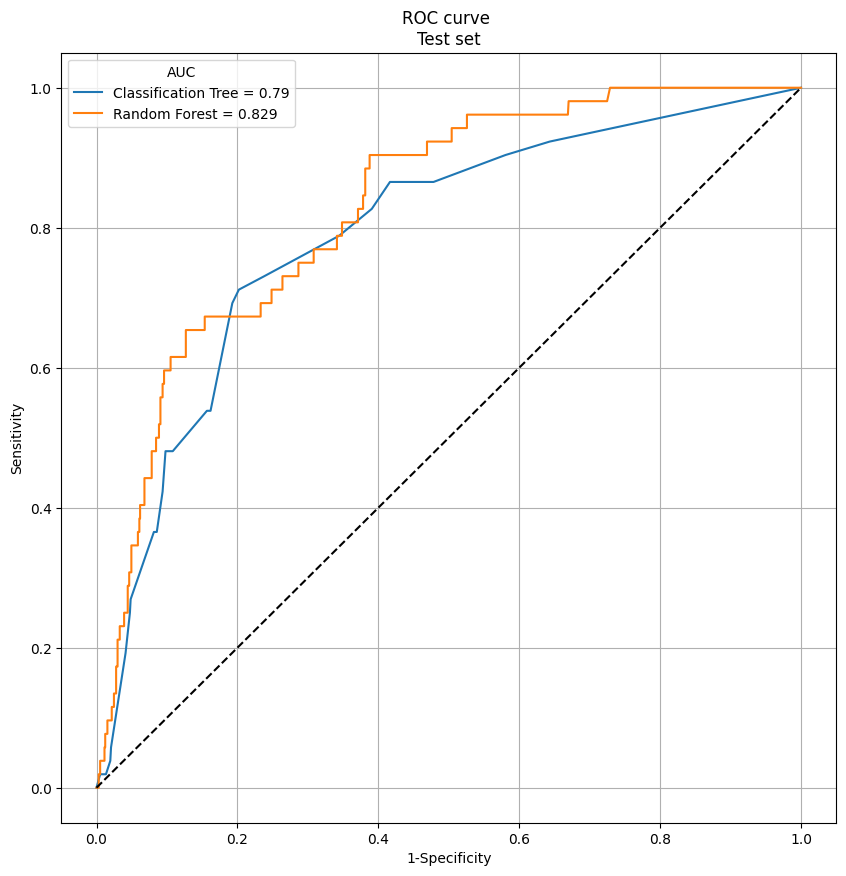

In [ ]:
Models = [classification_tree_cv1,RF_cv1]
Labels = ['Classification Tree','Random Forest']
ROC_comparison(Models, Labels, X_test1, y_test1, 'Test set')


### After resampling

###Train

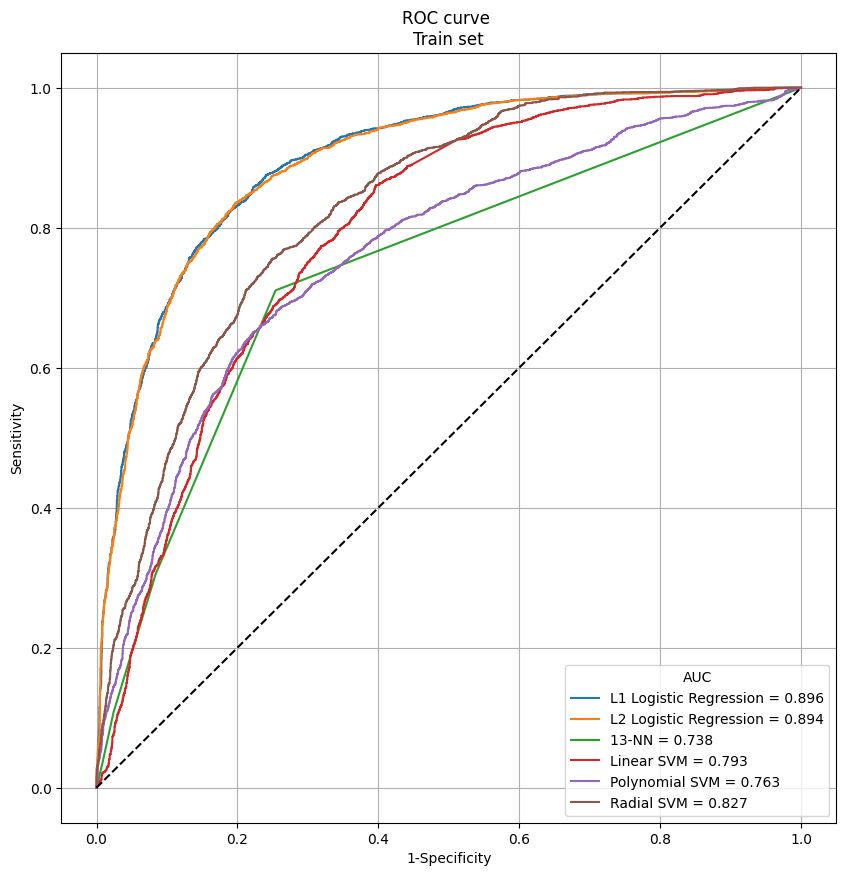

In [ ]:
Models = [log_reg_l1_cv, log_reg_l2_cv, knn_cv,svm_l_cv,svm_p_cv,svm_r_cv]
Labels = ['L1 Logistic Regression', 'L2 Logistic Regression', str(knn_cv.best_params_['n_neighbors'])+'-NN','Linear SVM','Polynomial SVM','Radial SVM']
ROC_comparison(Models, Labels, X_train_scaled, y_train, 'Train set')


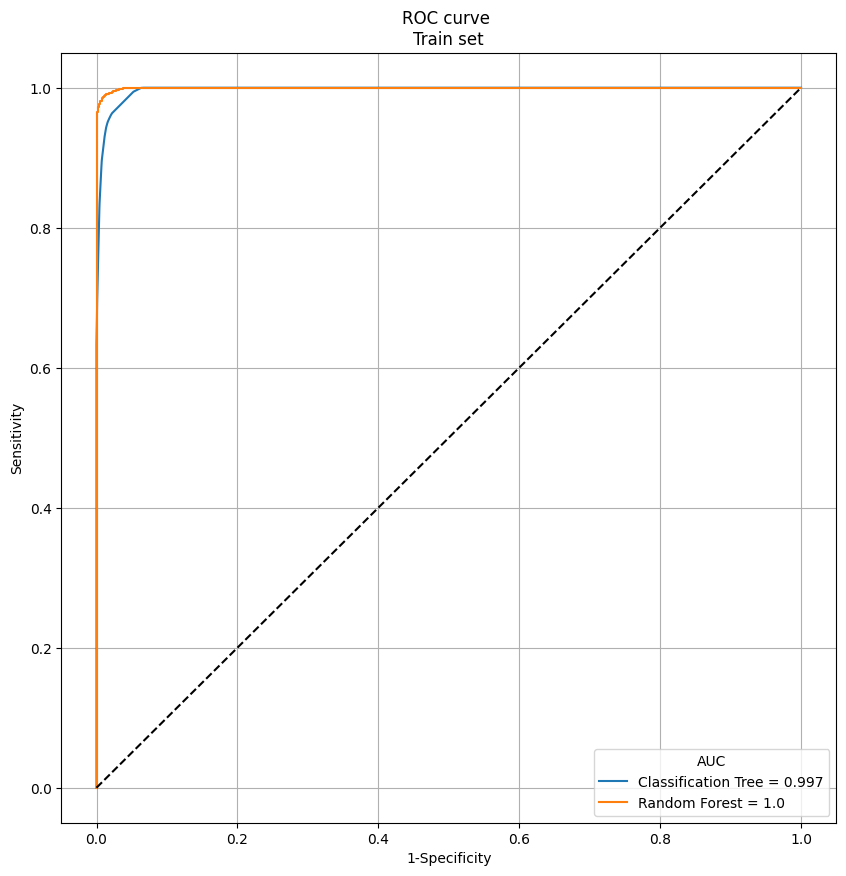

In [ ]:
Models = [classification_tree_cv,RF_cv]
Labels = ['Classification Tree','Random Forest']
ROC_comparison(Models, Labels, X_train, y_train, 'Train set')


###Test

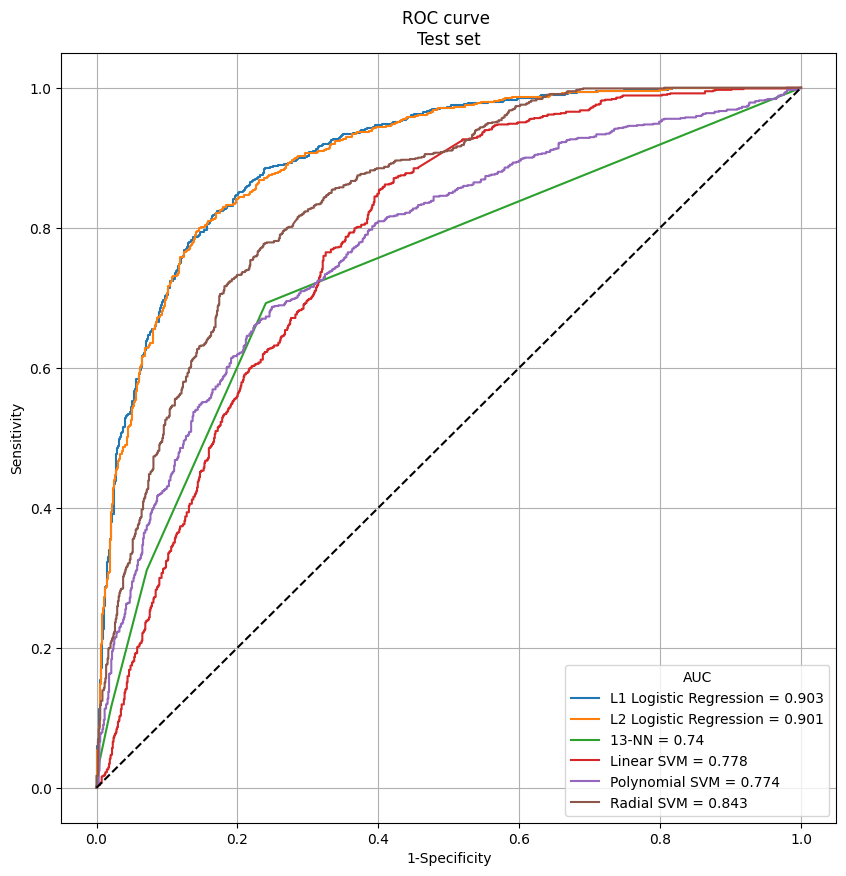

In [ ]:
Models = [log_reg_l1_cv, log_reg_l2_cv, knn_cv,svm_l_cv,svm_p_cv,svm_r_cv]
Labels = ['L1 Logistic Regression', 'L2 Logistic Regression', str(knn_cv.best_params_['n_neighbors'])+'-NN','Linear SVM','Polynomial SVM','Radial SVM']
ROC_comparison(Models, Labels, X_test_scaled, y_test, 'Test set')


**We can see that the best AUC for Test is from LASSO Logistic Regression.**

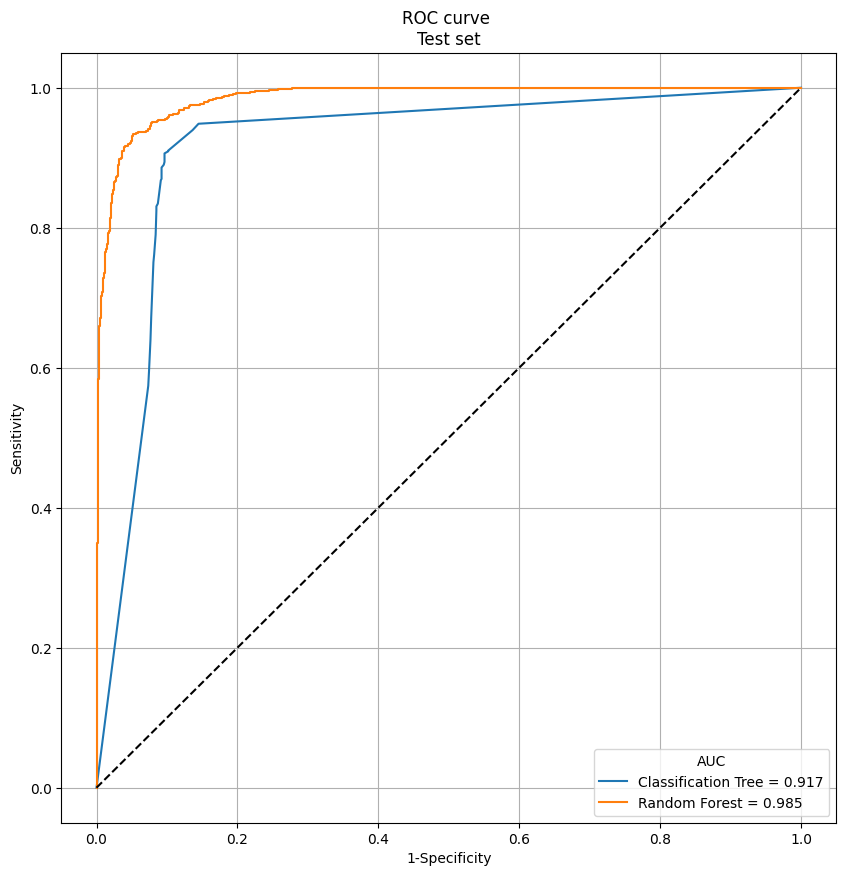

In [ ]:
Models = [classification_tree_cv,RF_cv]
Labels = ['Classification Tree','Random Forest']
ROC_comparison(Models, Labels, X_test, y_test, 'Test set')


## ROC results:

1) **Logistic Regression (LASSO and RIDGE)**:

Both LASSO and RIDGE logistic regression models achieved relatively high AUC scores for both training and testing sets, indicating good discrimination ability in distinguishing between positive and negative instances.

2) **K-Nearest Neighbors (KNN)**:

The KNN model exhibited moderate AUC scores for both training and testing sets, suggesting acceptable discriminative performance, although not as strong as logistic regression.

3) **Support Vector Machines (SVM)**:
SVM models with different kernels (Linear, Polynomial, and Radial) showed varying AUC scores, with Radial SVM achieving the highest AUC for both training and testing sets. This indicates that the Radial SVM model had better discriminatory power in distinguishing between classes.

4) **Classification Tree and Random Forest**:
The Classification Tree and Random Forest models demonstrated excellent discriminatory performance, as evidenced by their high AUC scores close to 1 for both training and testing sets. This suggests that these models were effective in separating the positive and negative instances in the dataset.

## TOP Models

**Before Resampling:**

* Top Models for Training Set (Highest AUC):

 1. Random Forest (AUC = 0.999)
 2. Classification Tree (AUC = 0.878)
 3. KNN (AUC = 0.879)

* Top Models for Testing Set (Highest AUC):

 1. Random Forest (AUC = 0.829)
 2. Ridge Regression (AUC = 0.834)
 3. KNN (AUC = 0.737)


**After Resampling:**

* Top Models for Training Set (Highest AUC):
 1. Random Forest (AUC = 1.000)
 2. Classification Tree (AUC = 0.997)
 3. LASSO Regression (AUC = 0.896)

* Top Models for Testing Set (Highest AUC):
 1. Random Forest (AUC = 0.985)
 2. Classification Tree (AUC = 0.917)
 3. LASSO Regression (AUC = 0.903)

**Before Resampling:**

* Random Forest consistently performs well, achieving the highest AUC in both training and testing sets.
* Classification Tree also shows strong performance, particularly after resampling.
* Other models vary in performance, with some showing lower AUC scores.

**After Resampling:**

* Random Forest continues to outperform other models, demonstrating excellent generalization to the testing set even after resampling.
* Classification Tree improves significantly after resampling and becomes one of the top-performing models.
* LASSO Regression also shows improvement in performance after resampling.

## Coclusion (2)

* Based on these results, **Random Forest** appears to be the most robust model for predicting stroke, especially after resampling.
* **Classification Tree** also shows promise, particularly after resampling, and could be a viable alternative

# Summary

* **Random Forest** got the highest score in the test accuracy among all models (0.934).
*  **Random Forest** consistently performs well, achieving the highest AUC in both training and testing sets.
* *WINNER* => ***Random Forest***  